In [1]:
# try applying kmeans twice
# once using colour segmentation approaches to detect most dominant colours on every single image
# gives a much smaller vector - can define length of vector by changing number of clusters in first kmeans
# idea of colour dominancy
# this is new representation of images
# apply kmeans again to this!!! - These are the clusters
# Then perform ClusterMatch!

# for colour segementation:
# kmeans, historgrams, etc - google solutions

# show results from data, improve with more advanced techniques

In [ ]:
import numpy as np
import cv2
import tqdm
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from tensorflow.keras.datasets import cifar10
import umap
from sklearn.metrics import silhouette_score
%matplotlib inline

2025-03-31 15:08:50.064211: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_aux = x_train[:25000], x_train[25000:]
y_train, y_aux = y_train[:25000], y_train[25000:]

print(f"Shape of training data: X: {x_train.shape}, Y: {y_train.shape}")
print(f"Shape of auxiliary data: X: {x_aux.shape}, y: {y_aux.shape}")

Shape of training data: X: (25000, 32, 32, 3), Y: (25000, 1)
Shape of auxiliary data: X: (25000, 32, 32, 3), y: (25000, 1)


(-0.5, 31.5, 31.5, -0.5)

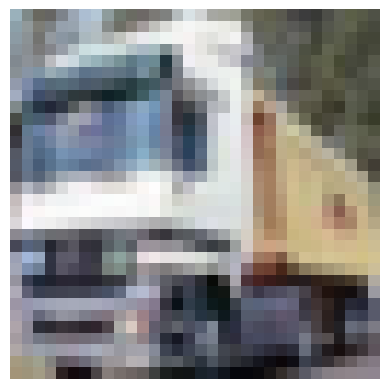

In [4]:
image = x_train[1]
plt.imshow(image)
plt.axis('off')

Original image shape: (32, 32, 3)
Reshaped image shape: (1024, 3)
Centres: [[ 81.14312  82.35316  86.24164]
 [184.5041  183.5144  179.4465 ]]
Centres: [[ 81  82  86]
 [184 183 179]]
Segmented data: [[184 183 179]
 [184 183 179]
 [ 81  82  86]
 ...
 [184 183 179]
 [184 183 179]
 [184 183 179]]


(-0.5, 31.5, 31.5, -0.5)

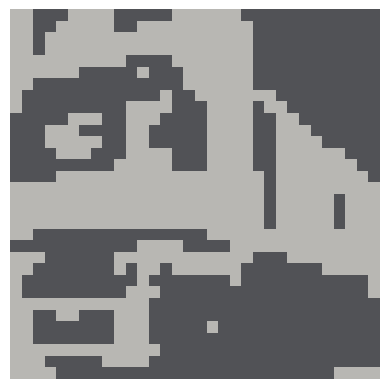

In [5]:
print(f"Original image shape: {image.shape}")
pixel_values = np.reshape(image, (-1, 3))
pixel_values = np.float32(pixel_values)
print(f"Reshaped image shape: {pixel_values.shape}")

k = 2
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
retval, labels, centres = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
print(f"Centres: {centres}")

centres = np.uint8(centres)
print(f"Centres: {centres}")

labels.flatten()

segmented_data = centres[labels.flatten()]
print(f"Segmented data: {segmented_data}")

segmented_image = segmented_data.reshape(image.shape)
labels_reshape = labels.reshape(image.shape[0], image.shape[1])
plt.imshow(segmented_image)
plt.axis('off')

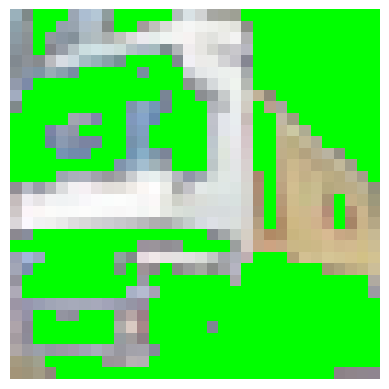

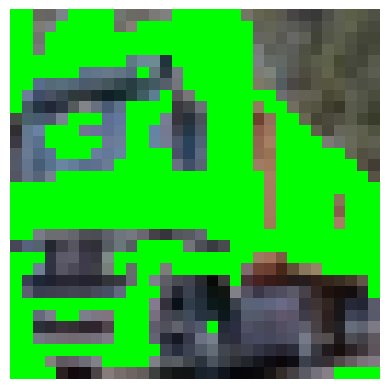

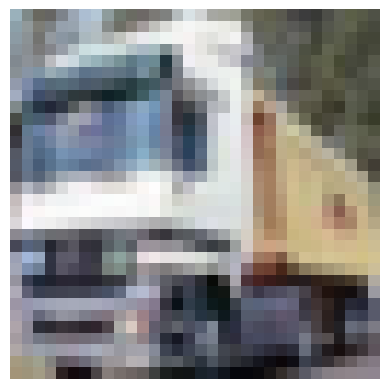

In [6]:
masked_image = np.copy(image)
cluster = 0
masked_image[labels_reshape == cluster] = [0, 255, 0]

plt.imshow(masked_image)
plt.axis('off')
plt.show()

masked_image = np.copy(image)
cluster = 1
masked_image[labels_reshape == cluster] = [0, 255, 0]

plt.imshow(masked_image)
plt.axis('off')
plt.show()

masked_image = np.copy(image)
cluster = 2
masked_image[labels_reshape == cluster] = [0, 255, 0]

plt.imshow(masked_image)
plt.axis('off')
plt.show()

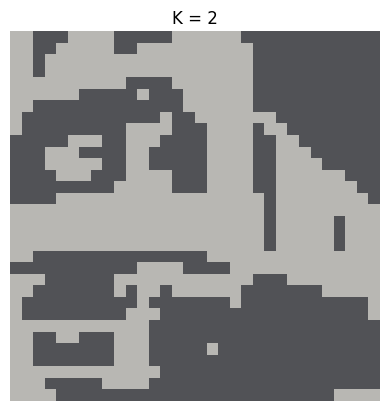

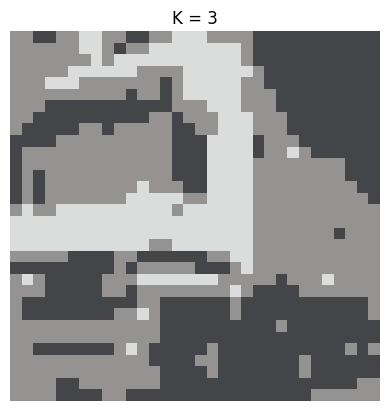

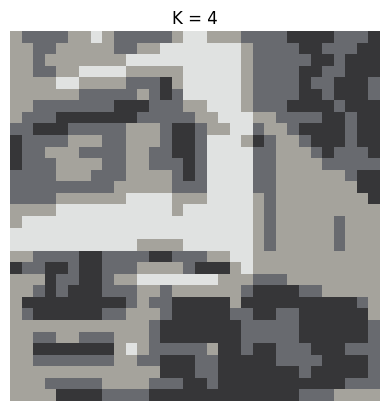

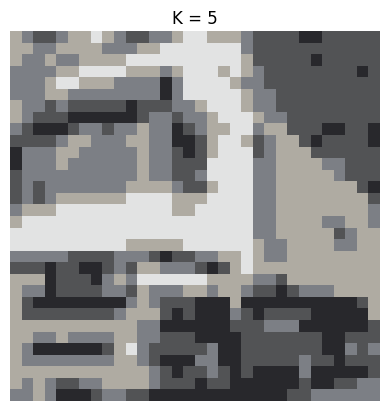

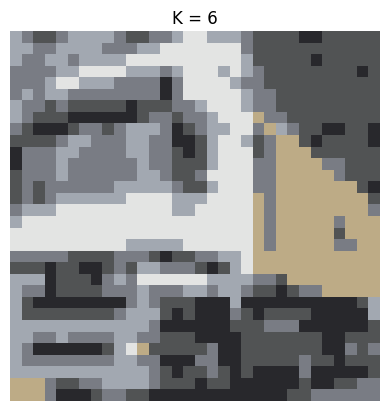

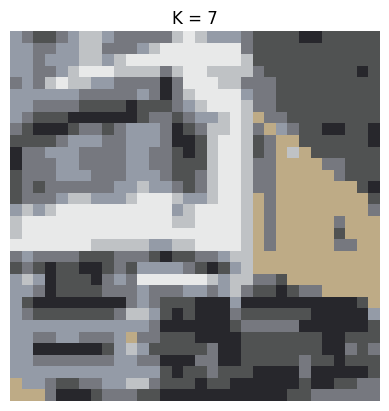

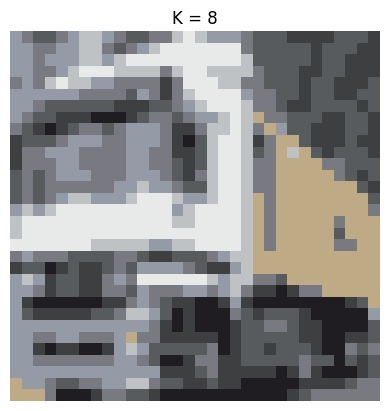

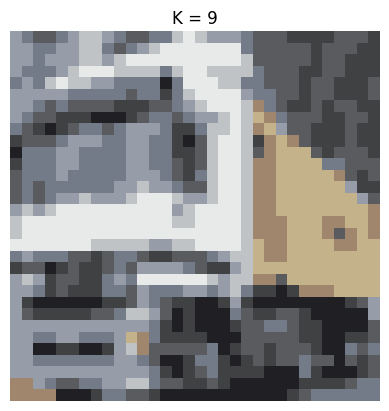

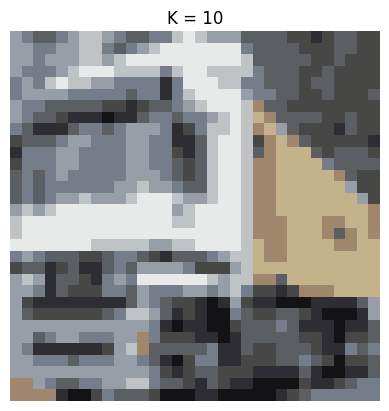

In [7]:
for k in range(2, 11):
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    retval, labels, centres = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centres = np.uint8(centres)
    segmented_data = centres[labels.flatten()]
    segmented_image = segmented_data.reshape(image.shape)
    labels_reshape = labels.reshape(image.shape[0], image.shape[1])

    plt.imshow(segmented_image)
    plt.title(f"K = {k}")
    plt.axis('off')
    plt.show()

In [8]:
'''
Next steps:
- Determine optimal k value
- Use KMeans to segment each image in the dataset like this
- Then use KMeans on the dataset as a whole to create the 100 clusters
- Visualise the clusters
- Perform clustermatch attack on the dataset
'''

'\nNext steps:\n- Determine optimal k value\n- Use KMeans to segment each image in the dataset like this\n- Then use KMeans on the dataset as a whole to create the 100 clusters\n- Visualise the clusters\n- Perform clustermatch attack on the dataset\n'

In [9]:
two_segmented_aux_images = []

for img in tqdm.tqdm(x_aux):
    pixel_values = np.reshape(img, (-1, 3))
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    retval, labels, centres = cv2.kmeans(pixel_values, 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centres = np.uint8(centres)
    segmented_data = centres[labels.flatten()]
    segmented_image = segmented_data.reshape(img.shape)
    two_segmented_aux_images.append(segmented_image)

two_segmented_aux_images = np.array(two_segmented_aux_images, dtype=np.uint8)
print(f"Shape of segmented aux images: {two_segmented_aux_images.shape}")

100%|██████████| 25000/25000 [00:55<00:00, 450.81it/s]

Shape of segmented aux images: (25000, 32, 32, 3)


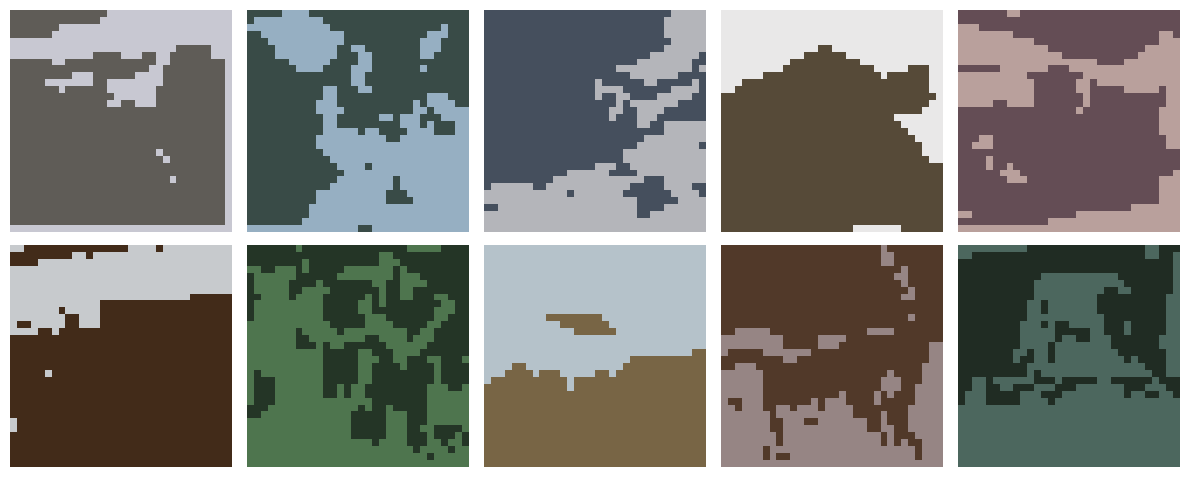

In [10]:
random_indices = random.sample(range(len(two_segmented_aux_images)), 10)
fig, axes = plt.subplots(2, 5, figsize=(12, 5))

for ax, idx in zip(axes.flatten(), random_indices):
    ax.imshow(two_segmented_aux_images[idx])
    ax.axis('off')

plt.tight_layout()
plt.show()

Shape of aux data image: (32, 32, 3)


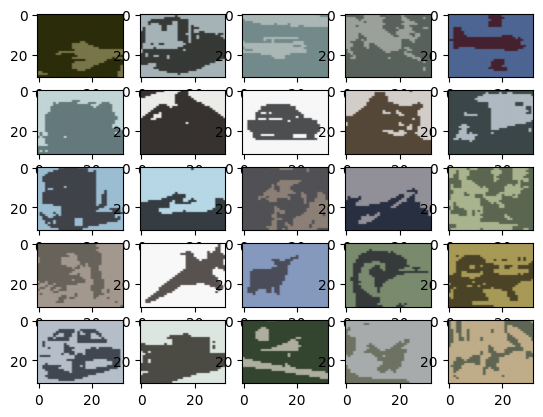

Shape of aux data: (25000, 3072)


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


There are 100 unique clusters in the auxiliary data
Cluster counts: [153 274 393 215 278 102 211 220 264 405 375 101 169 318 292 280  84 197
 112 118 510 537 187 167 282 182 151 245 348 349 179 464 408 200 169 180
 217 177 189  66 590 211 203 195 239 186 184 236 115 214 105 171 231 120
 315 203 125 205 114 265 152 336 551 342 426 227 202 213 206 273 133 111
 222 282 327 179 120 571 227 182 163 291 258 221 500 433 491 127 259 250
 275 118 340 452 261 194 322 259 268 241]


In [11]:
print(f"Shape of aux data image: {two_segmented_aux_images[0].shape}")
x_aux_two = two_segmented_aux_images / 255.0
fig, ax = plt.subplots(5, 5)
k = 0
for i in range(5):
    for j in range(5):
        ax[i, j].imshow(x_aux_two[k], aspect='auto') 
        k += 1
plt.show()
x_aux_two = x_aux_two.reshape(25000, -1)
print(f"Shape of aux data: {x_aux_two.shape}")

np.random.seed(42)

two_kmeans = KMeans(n_clusters=100, random_state=42) # euclidian distance
two_kmeans.fit(x_aux_two)

# train_km = kmeans.predict(x_train)
# test_km = kmeans.predict(x_test)

cluster_indices, cluster_counts = np.unique(two_kmeans.labels_, return_counts=True)

print(f'There are {len(cluster_indices)} unique clusters in the auxiliary data')
print(f'Cluster counts: {cluster_counts}')

In [36]:
two_silhouette = silhouette_score(x_aux_two, two_kmeans.labels_)
print(f'Silhouette score: {two_silhouette}')

Silhouette score: -0.002994028688717101


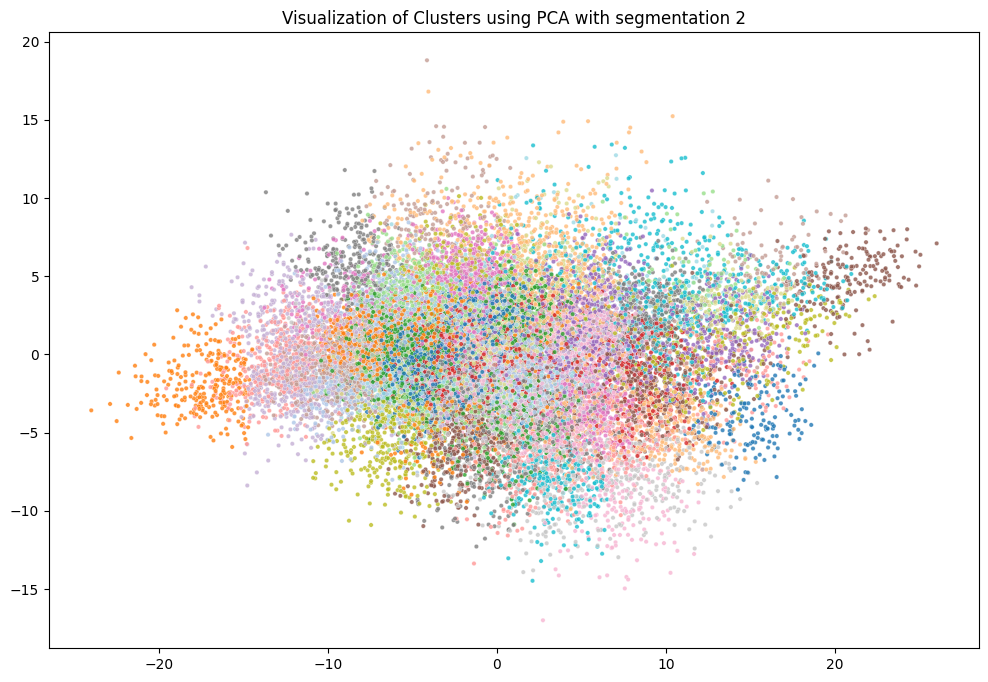

In [ ]:
pca = PCA(n_components=2)
two_x_aux_pca = pca.fit_transform(x_aux_two)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=two_x_aux_pca[:, 0], y=two_x_aux_pca[:, 1], hue=two_kmeans.labels_, palette='tab20', s=10, alpha=0.8)
plt.title("Visualisation of Clusters using PCA with segmentation 2")
# no legend
plt.legend().remove()
plt.show()

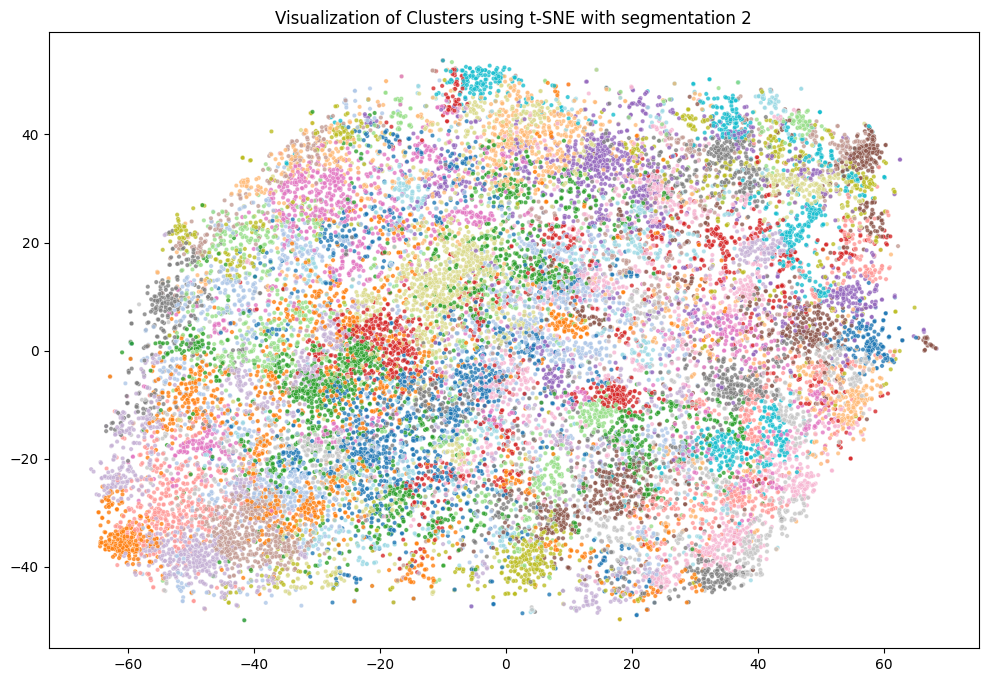

In [ ]:
tsne = TSNE(n_components=2, perplexity=30)
two_x_aux_tsne = tsne.fit_transform(x_aux_two)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=two_x_aux_tsne[:, 0], y=two_x_aux_tsne[:, 1], hue=two_kmeans.labels_, palette='tab20', s=10, alpha=0.8)
plt.title("Visualisation of Clusters using t-SNE with segmentation 2")
plt.legend().remove()
plt.show()

100%|██████████| 25000/25000 [06:57<00:00, 59.90it/s]


Shape of segmented aux images: (25000, 32, 32, 3)


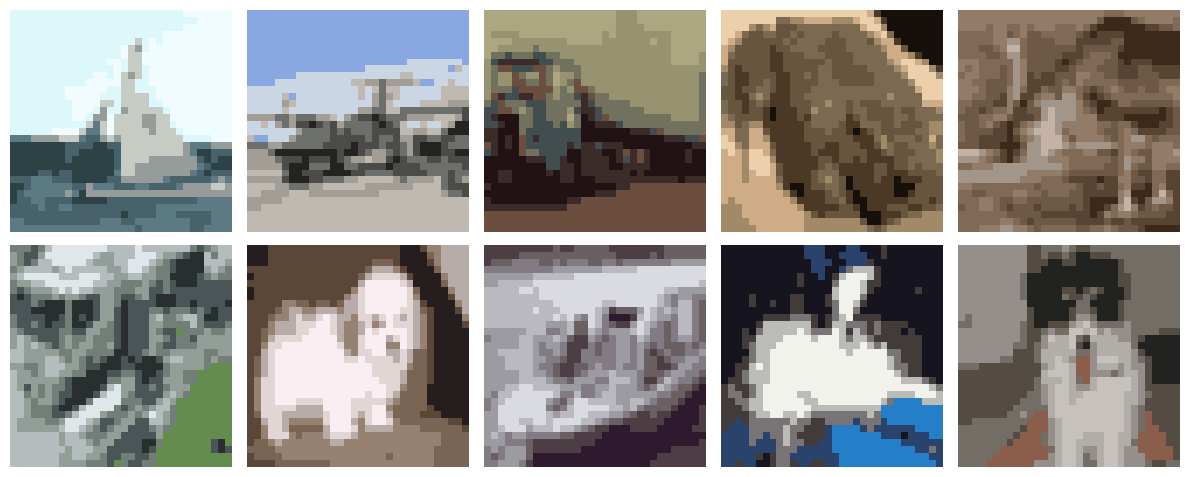

In [14]:
seven_segmented_aux_images = []
k = 7

for img in tqdm.tqdm(x_aux):
    pixel_values = np.reshape(img, (-1, 3))
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    retval, labels, centres = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centres = np.uint8(centres)
    segmented_data = centres[labels.flatten()]
    segmented_image = segmented_data.reshape(img.shape)
    seven_segmented_aux_images.append(segmented_image)

seven_segmented_aux_images = np.array(seven_segmented_aux_images, dtype=np.uint8)
print(f"Shape of segmented aux images: {seven_segmented_aux_images.shape}")

random_indices = random.sample(range(len(seven_segmented_aux_images)), 10)
fig, axes = plt.subplots(2, 5, figsize=(12, 5))

for ax, idx in zip(axes.flatten(), random_indices):
    ax.imshow(seven_segmented_aux_images[idx])
    ax.axis('off')

plt.tight_layout()
plt.show()

Shape of aux data image: (32, 32, 3)


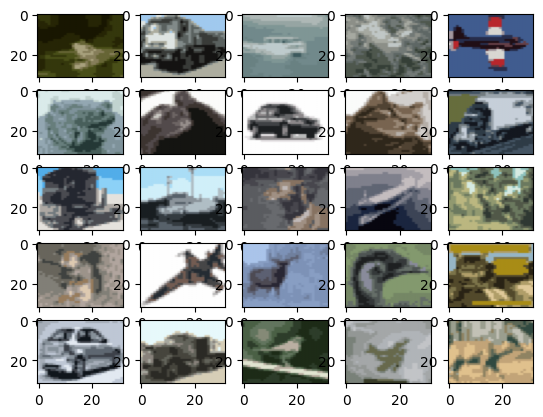

Shape of aux data: (25000, 3072)


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


There are 100 unique clusters in the auxiliary data
Cluster counts: [242 174 209 214 358 279 216 137 278 345 255 263 180 248 219 366 202 213
 325 406 121 296 438 101 258 163 287 123 195 366 293 128 216 249 217 225
 286 256 165 163 218 251 312 218 238 293  92 224 192 351 147 179 254 231
 126 255 599 137 283 209 477 299 432 145 279 283 211 327 270 321 558 259
 162 254 185 341 112 229 191 313 239 162 113 285 304 237 424 188 157 124
 312 122 304 226 537 216 304 162 219 233]


In [15]:
print(f"Shape of aux data image: {seven_segmented_aux_images[0].shape}")
x_aux_seven = seven_segmented_aux_images / 255.0
fig, ax = plt.subplots(5, 5)
k = 0
for i in range(5):
    for j in range(5):
        ax[i, j].imshow(x_aux_seven[k], aspect='auto') 
        k += 1
plt.show()
x_aux_seven = x_aux_seven.reshape(25000, -1)
print(f"Shape of aux data: {x_aux_seven.shape}")

np.random.seed(42)

seven_kmeans = KMeans(n_clusters=100, random_state=42) # euclidian distance
seven_kmeans.fit(x_aux_seven)

# train_km = kmeans.predict(x_train)
# test_km = kmeans.predict(x_test)

cluster_indices, cluster_counts = np.unique(seven_kmeans.labels_, return_counts=True)

print(f'There are {len(cluster_indices)} unique clusters in the auxiliary data')
print(f'Cluster counts: {cluster_counts}')

In [37]:
seven_silhouette = silhouette_score(x_aux_seven, seven_kmeans.labels_)
print(f'Silhouette score: {seven_silhouette}')

Silhouette score: 0.004376692180462084


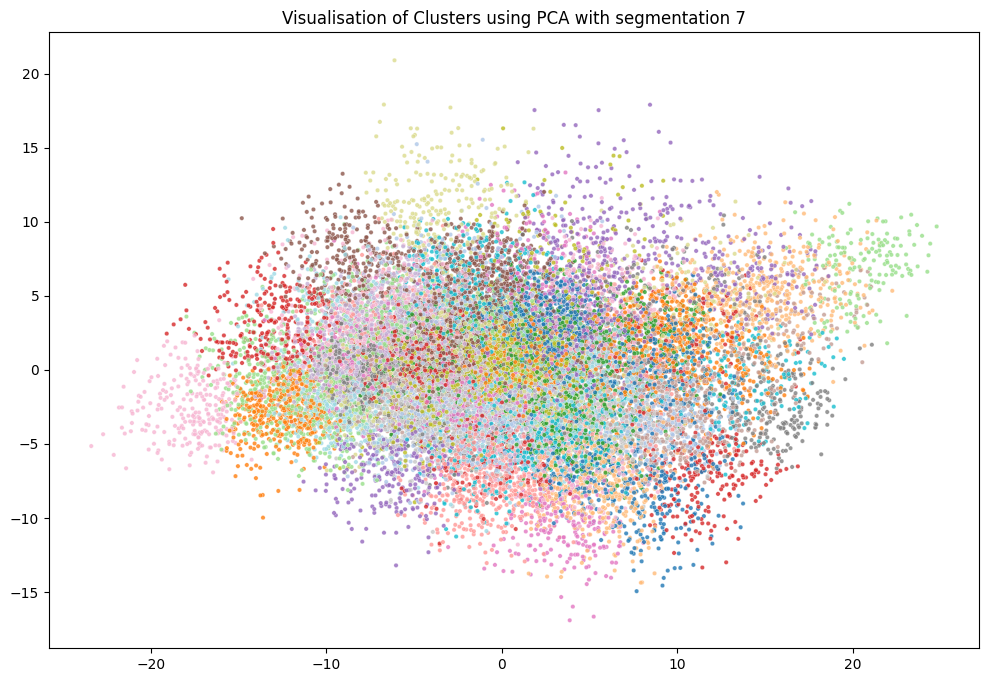

In [16]:
pca = PCA(n_components=2)
seven_x_aux_pca = pca.fit_transform(x_aux_seven)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=seven_x_aux_pca[:, 0], y=seven_x_aux_pca[:, 1], hue=seven_kmeans.labels_, palette='tab20', s=10, alpha=0.8)
plt.title("Visualisation of Clusters using PCA with segmentation 7")
# no legend
plt.legend().remove()
plt.show()

In [41]:
seven_pca_kmeans = KMeans(n_clusters=100, random_state=42)
seven_pca_kmeans.fit(seven_x_aux_pca)

cluster_indices, cluster_counts = np.unique(seven_pca_kmeans.labels_, return_counts=True)

print(f'There are {len(cluster_indices)} unique clusters in the auxiliary data')
print(f'Cluster counts: {cluster_counts}')

seven_pca_silhouette = silhouette_score(seven_x_aux_pca, seven_pca_kmeans.labels_)
print(f'Silhouette score: {seven_pca_silhouette}')

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


There are 100 unique clusters in the auxiliary data
Cluster counts: [293 508 298 247 358 167 414 168 215 525 254 188 129 439 351 120 371 340
 314 242 251  74 175  81 238 156  59  44 339 136 194 426 119 436 314 358
 321 148 246 315  80 530 117  91 203 176 153 242 271 381 305 520 197 114
 415 135 249 398 178  68 289 101 496 344  97 105 172 339 197 345 103 152
 320 279 313 469 277 335 102  68 383 463 104 292 204 166 314 476 268 382
 251  90  33 104 352 166 283 209 259 104]
Silhouette score: 0.32373100969085733


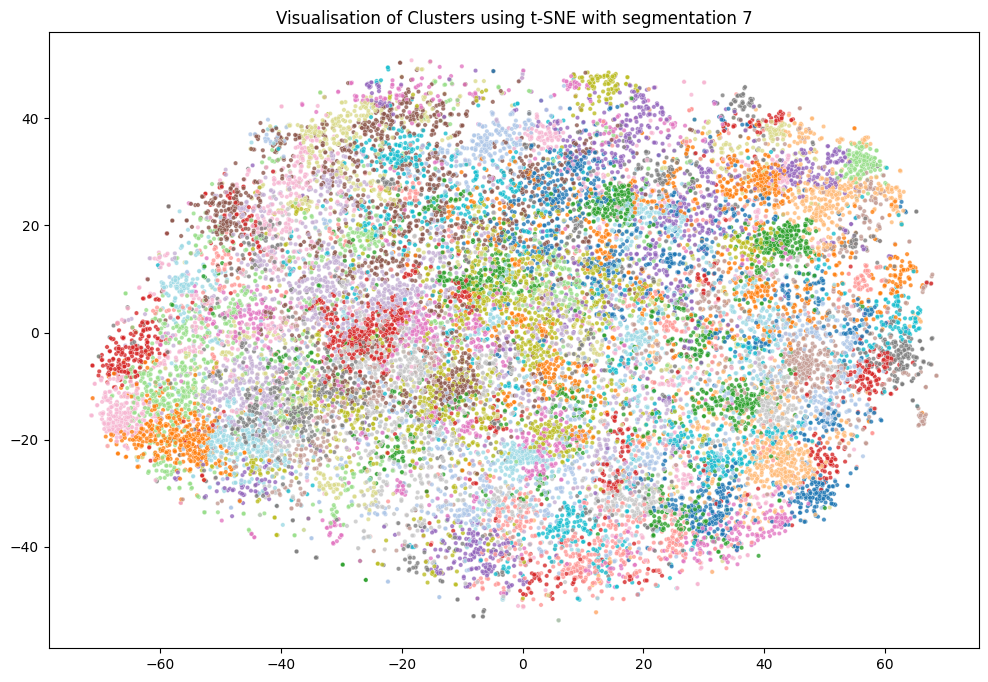

In [17]:
tsne = TSNE(n_components=2, perplexity=30)
seven_x_aux_tsne = tsne.fit_transform(x_aux_seven)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=seven_x_aux_tsne[:, 0], y=seven_x_aux_tsne[:, 1], hue=seven_kmeans.labels_, palette='tab20', s=10, alpha=0.8)
plt.title("Visualisation of Clusters using t-SNE with segmentation 7")
plt.legend().remove()
plt.show()

In [42]:
seven_tsne_kmeans = KMeans(n_clusters=100, random_state=42)
seven_tsne_kmeans.fit(seven_x_aux_tsne)

cluster_indices, cluster_counts = np.unique(seven_tsne_kmeans.labels_, return_counts=True)

print(f'There are {len(cluster_indices)} unique clusters in the auxiliary data')
print(f'Cluster counts: {cluster_counts}')

seven_tsne_silhouette = silhouette_score(seven_x_aux_tsne, seven_tsne_kmeans.labels_)
print(f'Silhouette score: {seven_tsne_silhouette}')

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


There are 100 unique clusters in the auxiliary data
Cluster counts: [304 251 188 269 254 258 224 247 282 205 243 277 246 337 197 223 257 247
 184 239  97 161 200 263 281 365 343 308 258 227 251 264 277 274 294 252
 222 220 248 223 277 253 375 201 253 215 271 328  89 241 266 317 261 274
 272 277 277 204 232 210 210 344 227 254 268 243 228 191 191 246 234 190
 278 314 230 253 262 217 262 254 250 293 224 226 281 290 268 210 204 222
 240 276 293 272 282 174 315 315 188 228]
Silhouette score: 0.34170669317245483


100%|██████████| 25000/25000 [07:59<00:00, 52.10it/s]


Shape of segmented aux images: (25000, 32, 32, 3)


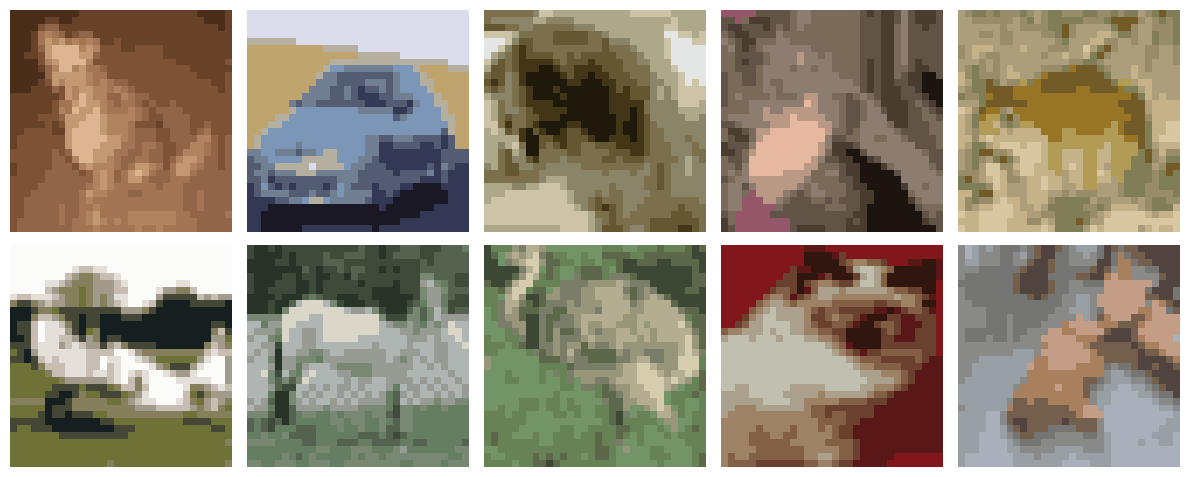

In [18]:
eight_segmented_aux_images = []
k = 8

for img in tqdm.tqdm(x_aux):
    pixel_values = np.reshape(img, (-1, 3))
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    retval, labels, centres = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centres = np.uint8(centres)
    segmented_data = centres[labels.flatten()]
    segmented_image = segmented_data.reshape(img.shape)
    eight_segmented_aux_images.append(segmented_image)

eight_segmented_aux_images = np.array(eight_segmented_aux_images, dtype=np.uint8)
print(f"Shape of segmented aux images: {eight_segmented_aux_images.shape}")

random_indices = random.sample(range(len(eight_segmented_aux_images)), 10)
fig, axes = plt.subplots(2, 5, figsize=(12, 5))

for ax, idx in zip(axes.flatten(), random_indices):
    ax.imshow(eight_segmented_aux_images[idx])
    ax.axis('off')

plt.tight_layout()
plt.show()

Shape of aux data image: (32, 32, 3)


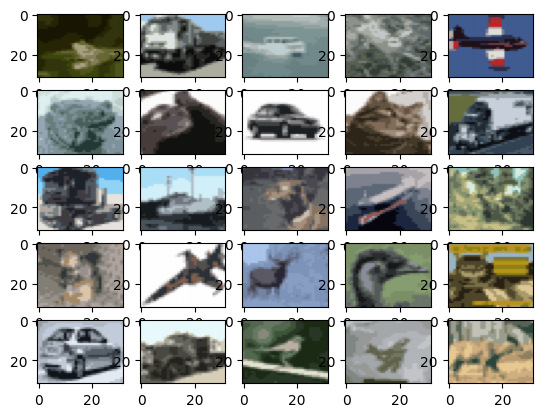

Shape of aux data: (25000, 3072)


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


There are 100 unique clusters in the auxiliary data
Cluster counts: [180 257 515 127 308 468 230 171 172 214 220 208 235 132 211 244 351 246
 256 367 239 298 251 292 311 277 320 203 226 281 255 156 247 184 132 152
 289 324 237 212 225 408 458 146 270 182 282 293 103 153 201 259 349 272
 317 321 229 577 209 205 247 212 523 210 335 241 132 104 507 141 233 520
 324 505 108 175 295 151 204 101 246 193 233 180 169 143 181 541 256 188
 210 186 266 208 277 151 125 119 247 156]


In [19]:
print(f"Shape of aux data image: {eight_segmented_aux_images[0].shape}")
x_aux_eight = eight_segmented_aux_images / 255.0
fig, ax = plt.subplots(5, 5)
k = 0
for i in range(5):
    for j in range(5):
        ax[i, j].imshow(x_aux_eight[k], aspect='auto') 
        k += 1
plt.show()
x_aux_eight = x_aux_eight.reshape(25000, -1)
print(f"Shape of aux data: {x_aux_eight.shape}")

np.random.seed(42)

eight_kmeans = KMeans(n_clusters=100, random_state=42) # euclidian distance
eight_kmeans.fit(x_aux_eight)

# train_km = kmeans.predict(x_train)
# test_km = kmeans.predict(x_test)

cluster_indices, cluster_counts = np.unique(eight_kmeans.labels_, return_counts=True)

print(f'There are {len(cluster_indices)} unique clusters in the auxiliary data')
print(f'Cluster counts: {cluster_counts}')

In [38]:
eight_silhouette = silhouette_score(x_aux_eight, eight_kmeans.labels_)
print(f'Silhouette score: {eight_silhouette}')

Silhouette score: 0.004550699480617334


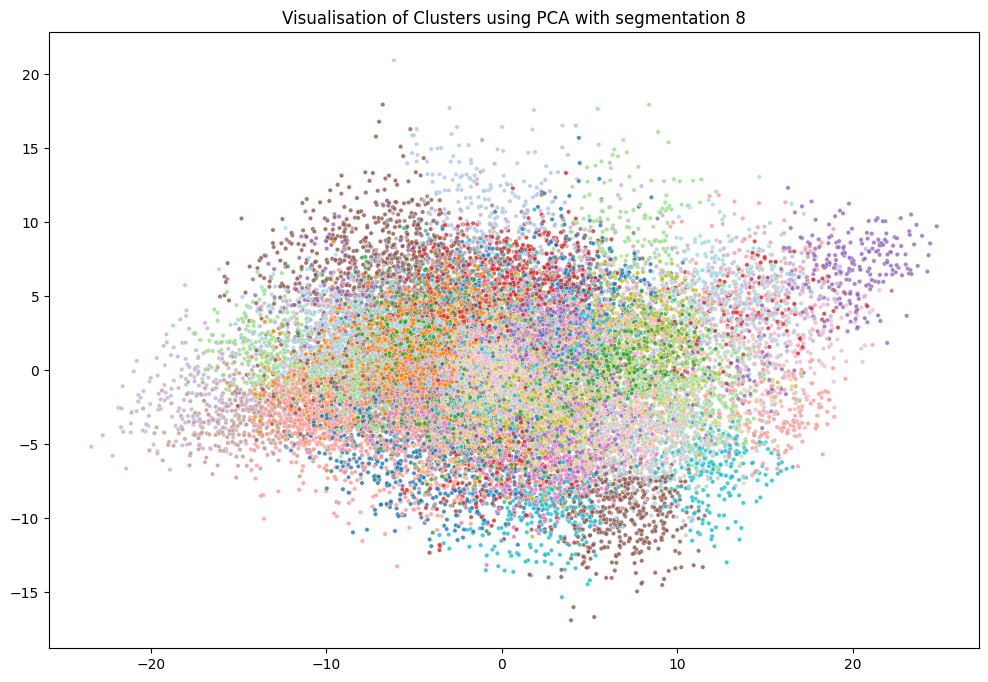

In [20]:
pca = PCA(n_components=2)
eight_x_aux_pca = pca.fit_transform(x_aux_eight)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=eight_x_aux_pca[:, 0], y=eight_x_aux_pca[:, 1], hue=eight_kmeans.labels_, palette='tab20', s=10, alpha=0.8)
plt.title("Visualisation of Clusters using PCA with segmentation 8")
# no legend
plt.legend().remove()
plt.show()

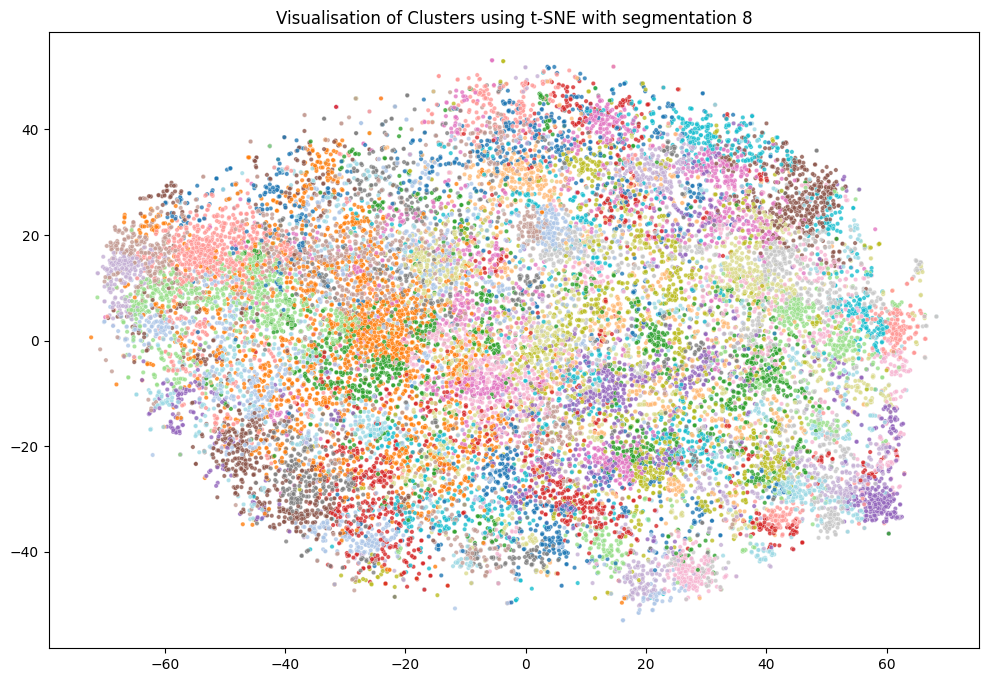

In [21]:
tsne = TSNE(n_components=2, perplexity=30)
eight_x_aux_tsne = tsne.fit_transform(x_aux_eight)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=eight_x_aux_tsne[:, 0], y=eight_x_aux_tsne[:, 1], hue=eight_kmeans.labels_, palette='tab20', s=10, alpha=0.8)
plt.title("Visualisation of Clusters using t-SNE with segmentation 8")
plt.legend().remove()
plt.show()

In [43]:
eight_pca_kmeans = KMeans(n_clusters=100, random_state=42)
eight_pca_kmeans.fit(eight_x_aux_pca)

cluster_indices, cluster_counts = np.unique(eight_pca_kmeans.labels_, return_counts=True)

print(f'There are {len(cluster_indices)} unique clusters in the auxiliary data')
print(f'Cluster counts: {cluster_counts}')

eight_pca_silhouette = silhouette_score(eight_x_aux_pca, eight_pca_kmeans.labels_)
print(f'Silhouette score: {eight_pca_silhouette}')

eight_tsne_kmeans = KMeans(n_clusters=100, random_state=42)
eight_tsne_kmeans.fit(eight_x_aux_tsne)

cluster_indices, cluster_counts = np.unique(eight_tsne_kmeans.labels_, return_counts=True)

print(f'There are {len(cluster_indices)} unique clusters in the auxiliary data')
print(f'Cluster counts: {cluster_counts}')

eight_tsne_silhouette = silhouette_score(eight_x_aux_tsne, eight_tsne_kmeans.labels_)
print(f'Silhouette score: {eight_tsne_silhouette}')

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


There are 100 unique clusters in the auxiliary data
Cluster counts: [481 215 299 227 368 274 236 292 441 456 256 238  54 117 562 245 243 399
 323  95 116 119  70 471 486 151 427  98 401  88 425 107  97  41 217 124
 300 220 346 251 117 208 172 454 272 353 348 151 310 312 241 255 291 267
 515 350 268 194 227  72 175 113  39 298 432  90 263 499 188 118 115 370
 199 186 358 406 232 359 131 283 180 172 489 417 325 107  82 375 167 108
 129  53 193 155 307 283 143 122 161 425]
Silhouette score: 0.3238582799956736


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


There are 100 unique clusters in the auxiliary data
Cluster counts: [291 274 319 313 238 247 276 266 272 321 280 243 198 242 292 268 255 274
 265 285 214 175 278 199 239 172 209 303 259 338 360 205 286 227 301 205
 255 274 302 250 191 265 155 320 169 219 240 220 220 246 219 242 199 198
 260 240 307 292 285 270 247 178 214 280 247 246 210 272 384 228 242 239
  78 203 184 252 292 264 232 153 254 284 261 290 230 322 302 312 233 237
 228 210 230 333 248 251 194 226 228 255]
Silhouette score: 0.3398391008377075


100%|██████████| 25000/25000 [08:37<00:00, 48.30it/s]


Shape of segmented aux images: (25000, 32, 32, 3)


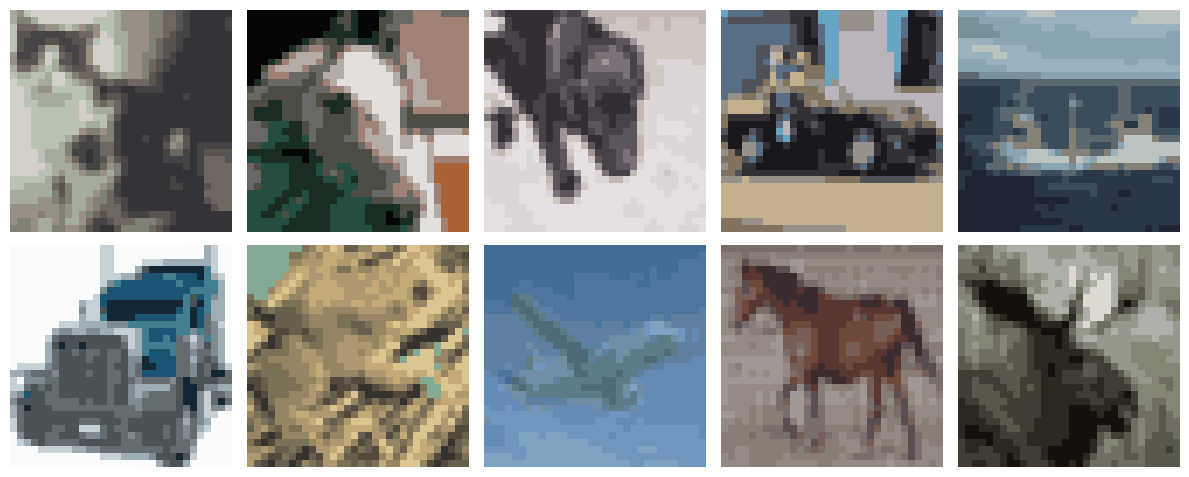

In [22]:
nine_segmented_aux_images = []
k = 9

for img in tqdm.tqdm(x_aux):
    pixel_values = np.reshape(img, (-1, 3))
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    retval, labels, centres = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centres = np.uint8(centres)
    segmented_data = centres[labels.flatten()]
    segmented_image = segmented_data.reshape(img.shape)
    nine_segmented_aux_images.append(segmented_image)

nine_segmented_aux_images = np.array(nine_segmented_aux_images, dtype=np.uint8)
print(f"Shape of segmented aux images: {nine_segmented_aux_images.shape}")

random_indices = random.sample(range(len(nine_segmented_aux_images)), 10)
fig, axes = plt.subplots(2, 5, figsize=(12, 5))

for ax, idx in zip(axes.flatten(), random_indices):
    ax.imshow(nine_segmented_aux_images[idx])
    ax.axis('off')

plt.tight_layout()
plt.show()

Shape of aux data image: (32, 32, 3)


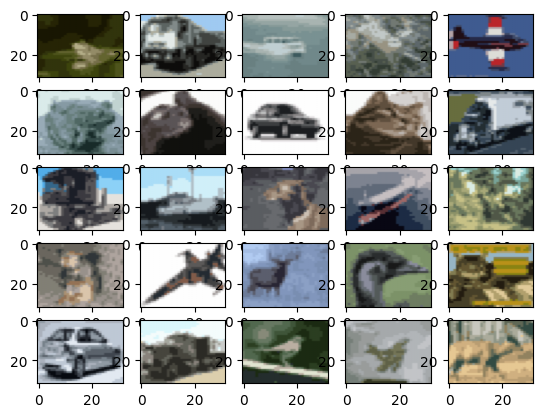

Shape of aux data: (25000, 3072)


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


There are 100 unique clusters in the auxiliary data
Cluster counts: [170 150 241 133 328 228 280 390 136 225 143 171 137 297 405 130 248 495
 279 206 200 394 246 246 153 271 249 128 404 189 129 318 278 123 414 216
 271 235 149 197 176 365 291 123 179 193 228 224 163 356 149 195 196 176
 274 167 408 146 327 403 176 252 500 206 303 324 281 210 212 137 604 296
 207 241 314 256 268 219 176 458 290 171 170 221 572 174 302 121 250 389
 250 163 242 187 293 187 184 215 273 365]


In [23]:
print(f"Shape of aux data image: {nine_segmented_aux_images[0].shape}")
x_aux_nine = nine_segmented_aux_images / 255.0
fig, ax = plt.subplots(5, 5)
k = 0
for i in range(5):
    for j in range(5):
        ax[i, j].imshow(x_aux_nine[k], aspect='auto') 
        k += 1
plt.show()
x_aux_nine = x_aux_nine.reshape(25000, -1)
print(f"Shape of aux data: {x_aux_nine.shape}")

np.random.seed(42)

nine_kmeans = KMeans(n_clusters=100, random_state=42) # euclidian distance
nine_kmeans.fit(x_aux_nine)

# train_km = kmeans.predict(x_train)
# test_km = kmeans.predict(x_test)

cluster_indices, cluster_counts = np.unique(nine_kmeans.labels_, return_counts=True)

print(f'There are {len(cluster_indices)} unique clusters in the auxiliary data')
print(f'Cluster counts: {cluster_counts}')

In [39]:
nine_silhouette = silhouette_score(x_aux_nine, nine_kmeans.labels_)
print(f'Silhouette score: {nine_silhouette}')

Silhouette score: 0.004398541385157083


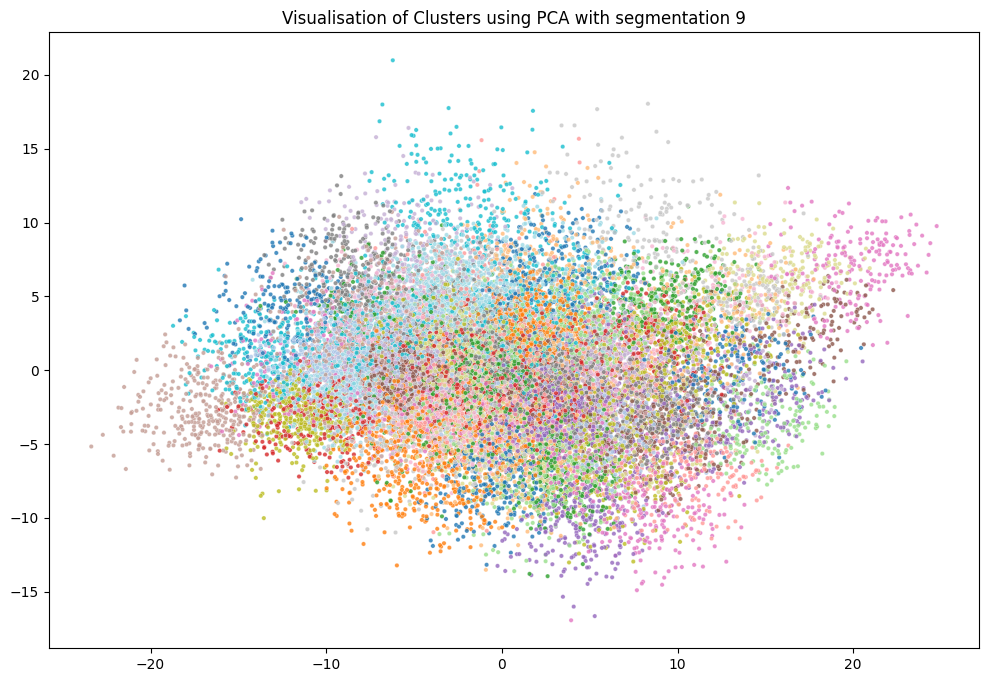

In [24]:
pca = PCA(n_components=2)
nine_x_aux_pca = pca.fit_transform(x_aux_nine)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=nine_x_aux_pca[:, 0], y=nine_x_aux_pca[:, 1], hue=nine_kmeans.labels_, palette='tab20', s=10, alpha=0.8)
plt.title("Visualisation of Clusters using PCA with segmentation 9")
# no legend
plt.legend().remove()
plt.show()

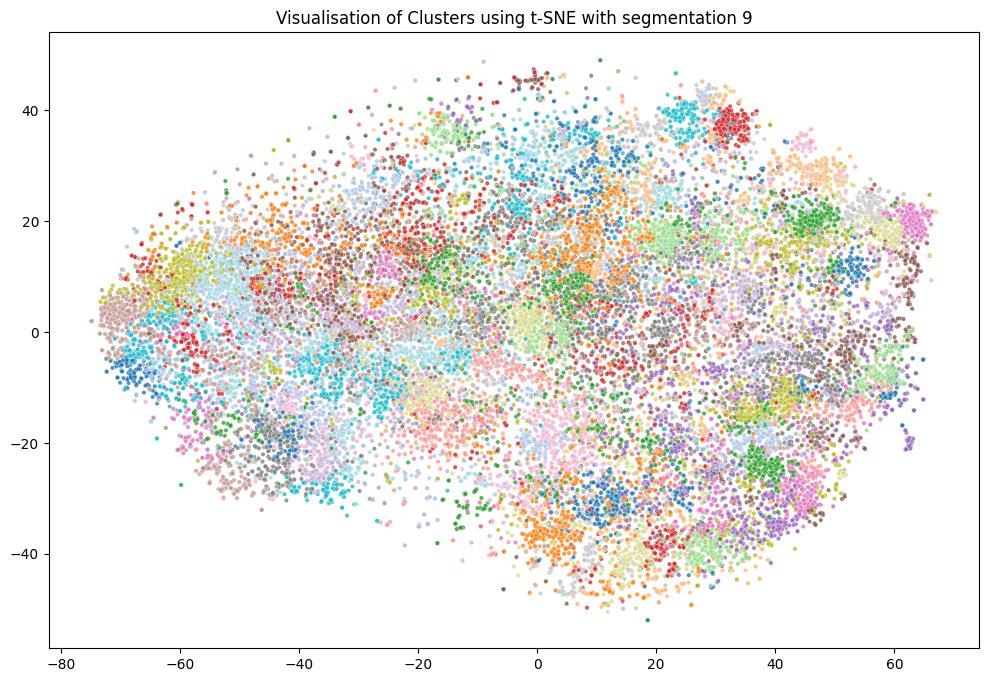

In [25]:
tsne = TSNE(n_components=2, perplexity=30)
nine_x_aux_tsne = tsne.fit_transform(x_aux_nine)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=nine_x_aux_tsne[:, 0], y=nine_x_aux_tsne[:, 1], hue=nine_kmeans.labels_, palette='tab20', s=10, alpha=0.8)
plt.title("Visualisation of Clusters using t-SNE with segmentation 9")
plt.legend().remove()
plt.show()

In [44]:
nine_pca_kmeans = KMeans(n_clusters=100, random_state=42)
nine_pca_kmeans.fit(nine_x_aux_pca)

cluster_indices, cluster_counts = np.unique(nine_pca_kmeans.labels_, return_counts=True)

print(f'There are {len(cluster_indices)} unique clusters in the auxiliary data')
print(f'Cluster counts: {cluster_counts}')

nine_pca_silhouette = silhouette_score(nine_x_aux_pca, nine_pca_kmeans.labels_)
print(f'Silhouette score: {nine_pca_silhouette}')

nine_tsne_kmeans = KMeans(n_clusters=100, random_state=42)
nine_tsne_kmeans.fit(nine_x_aux_tsne)

cluster_indices, cluster_counts = np.unique(nine_tsne_kmeans.labels_, return_counts=True)
print(f'There are {len(cluster_indices)} unique clusters in the auxiliary data')
print(f'Cluster counts: {cluster_counts}')

nine_tsne_silhouette = silhouette_score(nine_x_aux_tsne, nine_tsne_kmeans.labels_)
print(f'Silhouette score: {nine_tsne_silhouette}')

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


There are 100 unique clusters in the auxiliary data
Cluster counts: [209 483 209 297 235 339 119  84 421 173 222 229 337 357 200 175 420 489
  90 279 326 136 322 111  67 137 145 407 345  84 182 395 175 499 238 254
 145 455 228 307 392 122 449 201 257 527 104 210 307 105 386 120 127  43
 173 250 293 116 348 405 234 306 337  70 281  39 336 428  87 154 352 176
 365 230 453 106 286 245 108 251  76 256 125 497 293 163 371 234 205  97
 120  70 534 184 327 429 243 171 323 178]
Silhouette score: 0.3223605438931361


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


There are 100 unique clusters in the auxiliary data
Cluster counts: [241 275 311 253 173 249 253 284 239 277 266 244 279 201 263 198 349 305
 240 265 281 303 329 306 328 241 296 218 269 237 204 235 217 238 269 231
 218 259 248 207 247 206 331 311 260 207 265 308 274 217 221 295 197 108
 249 205 267 318 249 283 278 109 217 289 202 289 187 239 234 237 138 307
 291 303 290 249 358 230 305 259 252  84 118 290 253 180 259 238 299 215
 191 307 249 315 228 187 317 204 254 232]
Silhouette score: 0.3398821949958801


100%|██████████| 25000/25000 [08:54<00:00, 46.75it/s]


Shape of segmented aux images: (25000, 32, 32, 3)


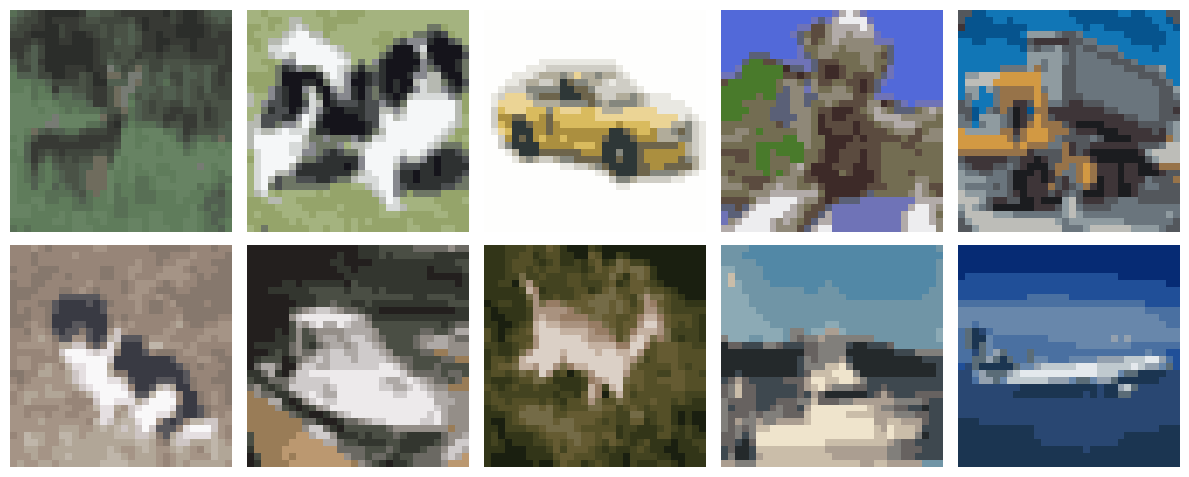

In [26]:
ten_segmented_aux_images = []
k = 10

for img in tqdm.tqdm(x_aux):
    pixel_values = np.reshape(img, (-1, 3))
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    retval, labels, centres = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centres = np.uint8(centres)
    segmented_data = centres[labels.flatten()]
    segmented_image = segmented_data.reshape(img.shape)
    ten_segmented_aux_images.append(segmented_image)

ten_segmented_aux_images = np.array(ten_segmented_aux_images, dtype=np.uint8)
print(f"Shape of segmented aux images: {ten_segmented_aux_images.shape}")

random_indices = random.sample(range(len(ten_segmented_aux_images)), 10)
fig, axes = plt.subplots(2, 5, figsize=(12, 5))

for ax, idx in zip(axes.flatten(), random_indices):
    ax.imshow(ten_segmented_aux_images[idx])
    ax.axis('off')

plt.tight_layout()
plt.show()

Shape of aux data image: (32, 32, 3)


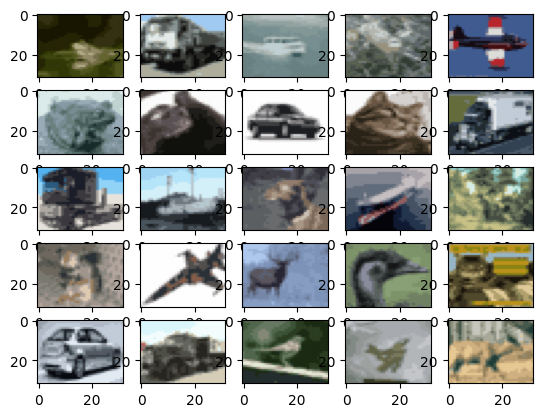

Shape of aux data: (25000, 32, 32, 3)


'\nTry without reshaping data too?\n'

In [27]:
print(f"Shape of aux data image: {ten_segmented_aux_images[0].shape}")
x_aux_ten = ten_segmented_aux_images / 255.0
fig, ax = plt.subplots(5, 5)
k = 0
for i in range(5):
    for j in range(5):
        ax[i, j].imshow(x_aux_ten[k], aspect='auto') 
        k += 1
plt.show()
x_aux_ten = x_aux_ten.reshape(25000, -1)
print(f"Shape of aux data: {x_aux.shape}")

'''
Try without reshaping data too?
'''

In [28]:
poison_rates = [0.5, 1, 2]

np.random.seed(42)

ten_kmeans = KMeans(n_clusters=100) # euclidian distance
ten_kmeans.fit(x_aux_ten)

# train_km = kmeans.predict(x_train)
# test_km = kmeans.predict(x_test)

cluster_indices, cluster_counts = np.unique(ten_kmeans.labels_, return_counts=True)

print(f'There are {len(cluster_indices)} unique clusters in the auxiliary data')
print(f'Cluster counts: {cluster_counts}')

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


There are 100 unique clusters in the auxiliary data
Cluster counts: [282 239 164 256 173 202 366 266 244 170 220 215 293 254 239 247 389 171
 334 239 122 126 243 517 219 202 194 379 331 180 259 273 133 214 229 323
 281 188 237 149 214 189 244 553 150 239 275 322 241 200 130 194 311 154
 219 263 342 157 485 311 303 179 276 200 523 189 273 433 185 215 292 149
 278 185 143 399 284 135 269 222 293 230 232 224 182 154 395 113 233 134
 350 284 308 290 167 171 240 260 490 163]


In [40]:
ten_silhouette = silhouette_score(x_aux_ten, ten_kmeans.labels_)
print(f'Silhouette score: {ten_silhouette}')


Silhouette score: 0.004532793499898685


In [29]:
# For non-reshaped data:

# cluster_centres = kmeans.cluster_centers_
# cluster_centres = (cluster_centres * 255).astype(np.uint8)

# fig, axes = plt.subplots(10, 10, figsize=(12, 12))
# for ax, color in zip(axes.flatten(), cluster_centres):
#     ax.imshow([[color]])
#     ax.axis('off')

# plt.tight_layout()
# plt.show()

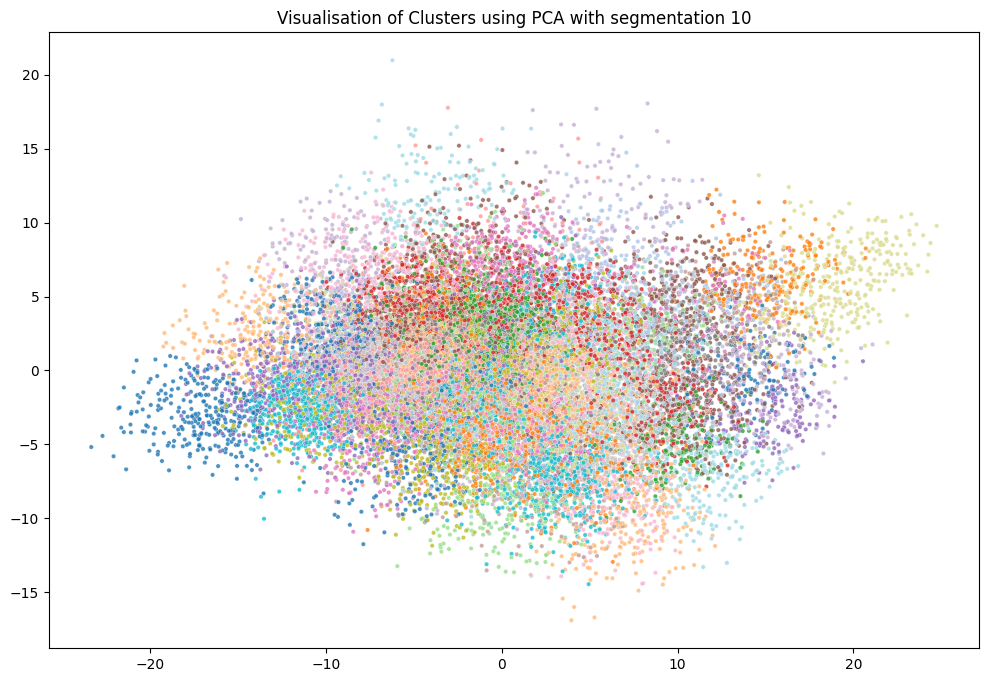

In [30]:
pca = PCA(n_components=2)
ten_x_aux_pca = pca.fit_transform(x_aux_ten)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=ten_x_aux_pca[:, 0], y=ten_x_aux_pca[:, 1], hue=ten_kmeans.labels_, palette='tab20', s=10, alpha=0.8)
plt.title("Visualisation of Clusters using PCA with segmentation 10")
# no legend
plt.legend().remove()
plt.show()

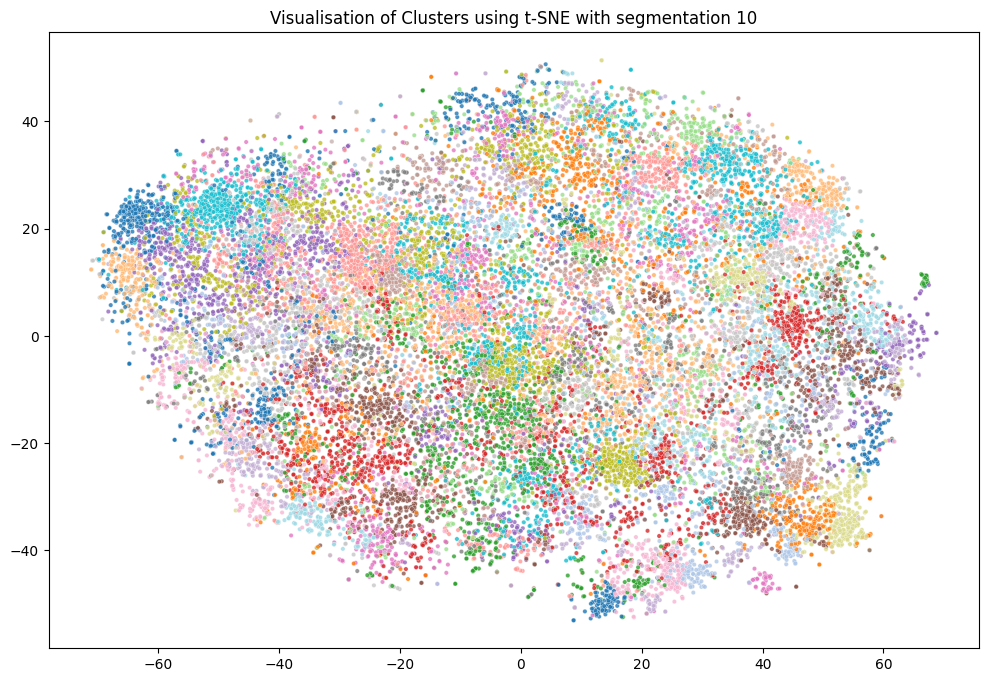

In [32]:
tsne = TSNE(n_components=2, perplexity=30)
ten_x_aux_tsne = tsne.fit_transform(x_aux_ten)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=ten_x_aux_tsne[:, 0], y=ten_x_aux_tsne[:, 1], hue=ten_kmeans.labels_, palette='tab20', s=10, alpha=0.8)
plt.title("Visualisation of Clusters using t-SNE with segmentation 10")
plt.legend().remove()
plt.show()

In [45]:
ten_pca_kmeans = KMeans(n_clusters=100, random_state=42)
ten_pca_kmeans.fit(ten_x_aux_pca)

cluster_indices, cluster_counts = np.unique(ten_pca_kmeans.labels_, return_counts=True)

print(f'There are {len(cluster_indices)} unique clusters in the auxiliary data')
print(f'Cluster counts: {cluster_counts}')

ten_pca_silhouette = silhouette_score(ten_x_aux_pca, ten_pca_kmeans.labels_)
print(f'Silhouette score: {ten_pca_silhouette}')

ten_tsne_kmeans = KMeans(n_clusters=100, random_state=42)
ten_tsne_kmeans.fit(ten_x_aux_tsne)

cluster_indices, cluster_counts = np.unique(ten_tsne_kmeans.labels_, return_counts=True)

print(f'There are {len(cluster_indices)} unique clusters in the auxiliary data')
print(f'Cluster counts: {cluster_counts}')

ten_tsne_silhouette = silhouette_score(ten_x_aux_tsne, ten_tsne_kmeans.labels_)
print(f'Silhouette score: {ten_tsne_silhouette}')

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


There are 100 unique clusters in the auxiliary data
Cluster counts: [332 181 249 245 291 410 194 288 291 383 176 207 305 286 151 339 101 345
 212 456 234 129 187 263 299 204 203  54 309 278  40 454 278 109 420 108
 427 421 359  41 243 374 125 385 347 128  74 211 216 346 153 207 306 116
 120 321 276 208 132 436 118 180  93 310 118 128 335 257 440 120 280  74
 256 375 231 418 196 251 133 276 382 210 367 288 303 152 104 129  55 375
 253  99 461 426 116 108 451 389 296 464]
Silhouette score: 0.3238141399614071


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


There are 100 unique clusters in the auxiliary data
Cluster counts: [284 264 230 258 325 267 272 173 238 213 294 249 227 229 327 261 263 304
 232 316 146 237 196 194 208 242 301 146 297 229 353 294 250 260 232 272
 206 271 277 223 162 255 308 223 282 258 244 236 277 262 257 284 285 251
 246 174 307 247 254 239 282 233 206 236 206 321 175 265 268 250 330 236
 187 274 314 217 264 260 283 328 298 221 252 391 213 312 265 223 234 308
 301 119 256 257 145 127  95 338 170 229]
Silhouette score: 0.3412763178348541


In [ ]:
# try umap
aux_umap = umap.UMAP(n_components=2, n_neighbors=10, min_dist=0.1)
ten_x_aux_umap = aux_umap.fit_transform(x_aux_ten)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=ten_x_aux_umap[:, 0], y=ten_x_aux_umap[:, 1], hue=ten_kmeans.labels_, palette='tab20', s=10, alpha=0.8)
plt.title("Visualisation of Clusters using UMAP with segmentation 10")
plt.legend().remove()
plt.show()

AttributeError: 'UMAP' object has no attribute 'UMAP'

In [ ]:
x_train_umap = umap.UMAP(n_components=2, n_neighbors=10, min_dist=0.1).fit_transform(x_train.reshape(25000, -1))

plt.figure(figsize=(12, 8))
sns.scatterplot(x=x_train_umap[:, 0], y=x_train_umap[:, 1], hue=y_train.flatten(), palette='tab10', s=10, alpha=0.8)
plt.title("Visualisation of Training Data using UMAP")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.legend()
plt.show()

AttributeError: 'UMAP' object has no attribute 'UMAP'